In [ ]:
from ramCOH import functions as f
import ramCOH.processing as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [ ]:
ne_file = r".\neon\Ne_2021_02_24_10_09_24_532nm_Edge_100%_Cuvette_H50_1800 (450-850nm)_30s x 2_01.txt"
x, y = np.genfromtxt(ne_file, unpack=True)

In [ ]:
birs = np.array([
    [1027, 1108],
    [1118, 1213],
    [1221, 1303],
    [1312, 1390],
    [1401, 1435],
    [1450, 1464]
])

In [ ]:
sort = np.argsort(x)
xbir, ybir = f._extractBIR(x[sort], y[sort], birs)
noise, spline = f._calculate_noise(xbir, ybir, 1)
noise

In [ ]:
neon = ram.neon(x, y)
neon.baselineCorrect(ram.neon.birs, smooth_factor=1)
neon.calculate_noise()

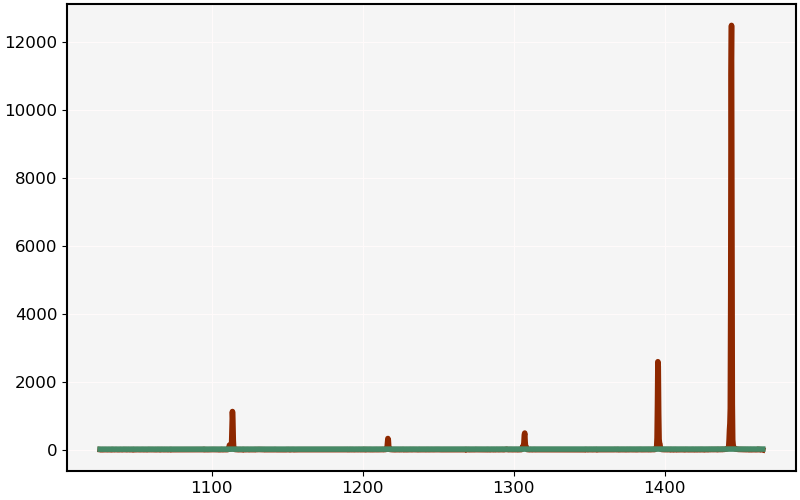

In [6]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(neon.x, neon.intensities["BC"])
plt.plot(neon.x, neon.baseline)

plt.show()

In [61]:
neon.deconvolve(noise_threshold=1.2, peak_prominence=3, fit_window=16, min_peak_width=0.5, noise=neon.noise)

c:\data\dropbox\python\packages\ramcoh\ramCOH\functions.py:628: UserWarning: Noise increased from last iteration, using previous result
  warnings.warn("Noise increased from last iteration, using previous result")


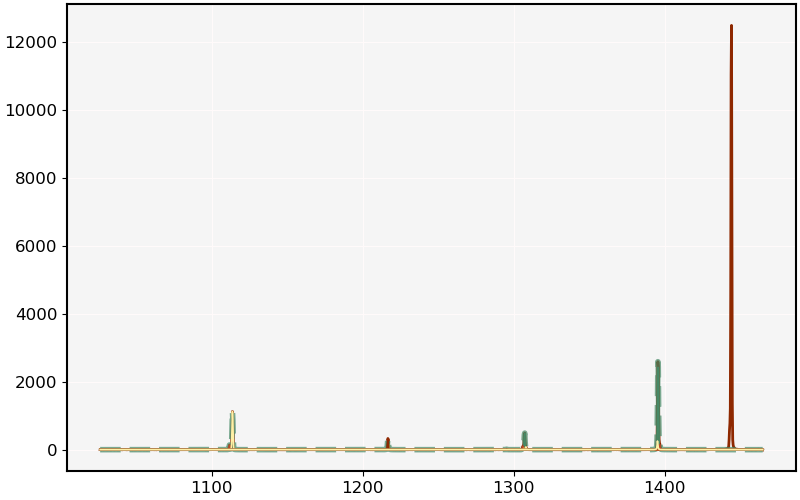

In [62]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(neon.x, neon.intensities["BC"], linewidth=2)
plt.plot(neon.x, f.sum_GaussLorentz(neon.x, *neon.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in neon.peaks:
    plt.plot(neon.x, f.GaussLorentz(neon.x, **curve), linewidth=1.2)
# plt.plot(xtrim, f.sum_GaussLorentz(xtrim, *params), linewidth=1)

In [56]:
_, centers, widths = f._find_peak_parameters(
    x=neon.x, y=neon.intensities["BC"], prominence=3
        )

ranges = f._get_peakFit_ranges(
    centers=centers, half_widths=widths, fit_window=4
)

print(ranges)
print(centers, widths)

xtrim, ytrim = f._trimxy_ranges(neon.x, neon.intensities["BC"], ranges[0])
amp, cent, wid = f._find_peak_parameters(x=xtrim, y=ytrim, prominence=3)

print(cent, amp, wid)

params, r2, _ = f.deconvolve_signal(xtrim, ytrim, prominence=2, noise_threshold=2, min_peak_width=0.5, noise=neon.noise)
r2

[[1110.9012176970043, 1116.7387823029956], [1304.2547252936374, 1310.4252747063624], [1392.3578218765608, 1398.6221781234392], [1441.217674466045, 1447.262325533955]]
[1113.82 1307.34 1395.49 1444.24] [0.72969558 0.77131868 0.78304453 0.75558138]
[1111.86 1113.82] [ 135.46871968 1121.99382151] [0.69569518 0.74089743]


0.9999871451731285

In [58]:
params

array([[1.11190548e+03, 1.11411020e+03, 1.11381546e+03],
       [1.34010058e+02, 2.77054312e+02, 1.01353559e+03],
       [3.02184515e-01, 2.11811001e-01, 2.86433282e-01],
       [6.92788637e-35, 2.22459167e-17, 2.53694083e-01],
       [6.02877584e-02, 6.20504648e-02, 6.13234751e-02]])

In [38]:

min_peak_width = 2
resolution = np.diff(xtrim).mean()
min_width = min_peak_width * resolution
min_amplitude = neon.noise * 3
xlength = xtrim.max() - xtrim.min()
# Left and right limits for: center, amplitude, width, shape and baselevel
leftBoundSimple = [x.min(), min_amplitude, min_width, 0.0, -5]
rightBoundSimple = [x.max(), y.max() * 1.5, xlength, 1.0, y.max()]
print(leftBoundSimple, rightBoundSimple)

[1026.23, 4.857194113970213, 0.5620000000000118, 0.0, -5] [1464.89, 18747.0, 5.620000000000118, 1.0, 12498.0]


In [32]:
peakAmount = len(amp)
keep = np.where((wid > min_width) & (amp > min_amplitude))
amp = amp[keep]
cent = cent[keep]
wid = wid[keep]
print(amp, cent, wid)

[] [] []


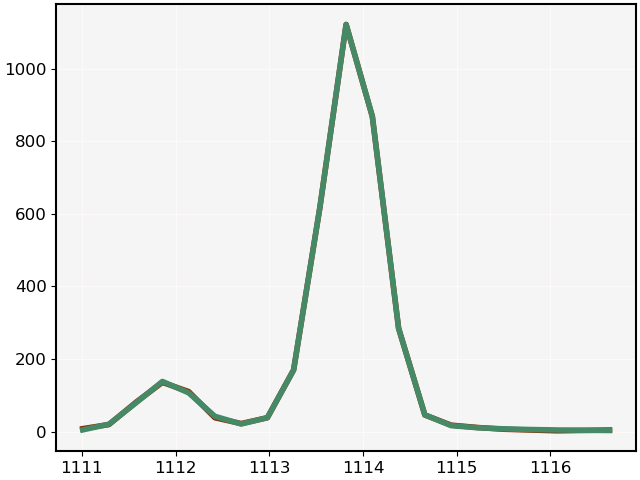

In [57]:
%matplotlib widget
plt.plot(xtrim, ytrim)
plt.plot(xtrim, f.sum_GaussLorentz(xtrim, *params))


In [16]:
import scipy.signal as signal
prominence_absolute = (2 / 100) * np.max(ytrim)
peaks = signal.find_peaks(ytrim, prominence=prominence_absolute)

amps, cents = ytrim[peaks[0]], xtrim[peaks[0]]
wids = signal.peak_widths(ytrim, peaks[0])[0] * abs(np.diff(xtrim).mean())
print(amps, cents, wids)


[ 135.46871968 1121.99382151] [1111.86 1113.82] [0.69569518 0.74089743]


In [28]:
_, cent, wid = f._find_peak_parameters(x=xtrim, y=ytrim, prominence=3)
print(cent, wid)

[1111.86 1113.82] [0.69569518 0.74089743]


In [ ]:
2 == True